In [1]:
import numpy as np
import pandas as pd
import vega_datasets as vd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
df_diamonds = sns.load_dataset('diamonds')
df_titanic = sns.load_dataset('titanic')
df_gpm_lxp = vd.data('gapminder')
df_cars = vd.data('cars')
df_flights = vd.data('flights_5k')
df_taxis = sns.load_dataset('taxis')

---
# Classification Algorithms

1. Input data has an underlying structure
2. We pick an algorithm that can model the shape of the decision boundary

<br>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" width=1200 height=900></img>

<br>

## Iris Data
----

<br>

In [5]:
df_iris = sns.load_dataset('iris')

In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


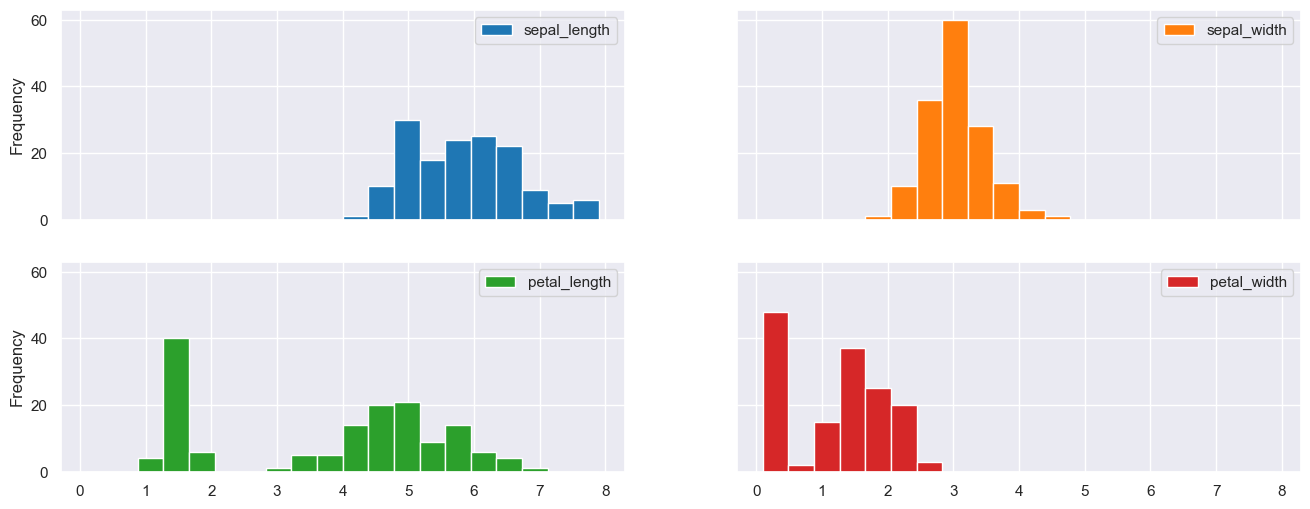

In [7]:
df_iris.drop(columns='species').plot.hist(subplots=True, layout=(2,2), figsize=(16, 6), bins=20, sharex=True, sharey=True);

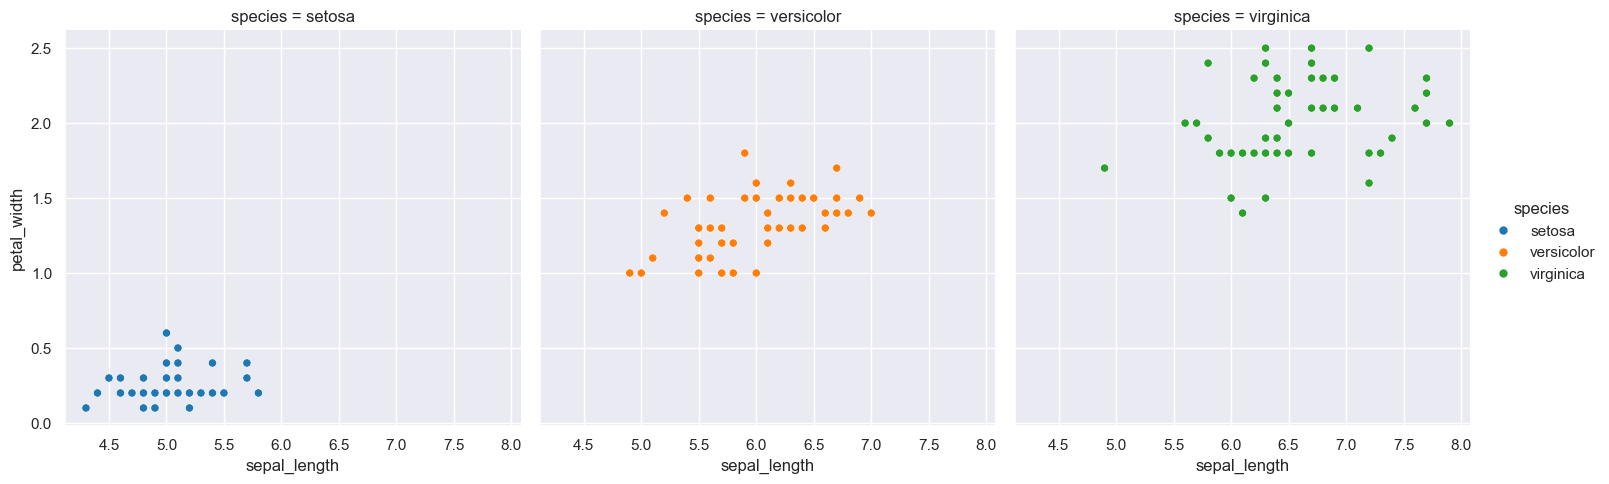

In [8]:
sns.relplot(x='sepal_length', y='petal_width', data=df_iris, hue='species', col='species');

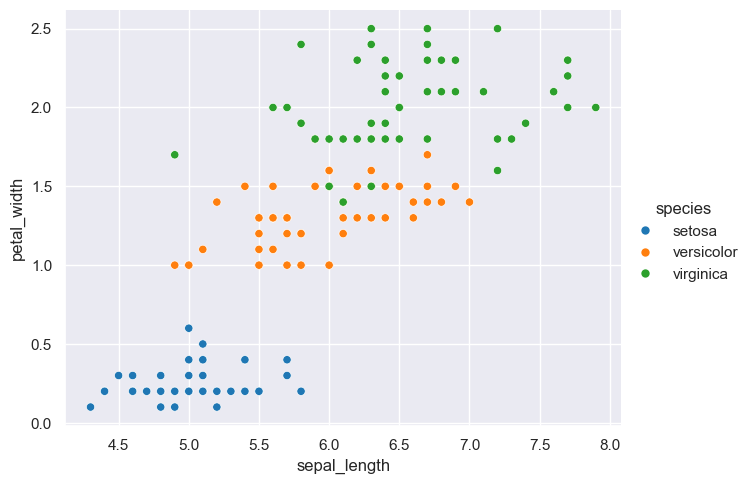

In [9]:
sns.relplot(x='sepal_length', y='petal_width', data=df_iris, hue='species', aspect=1.3);

<Axes: ylabel='species'>

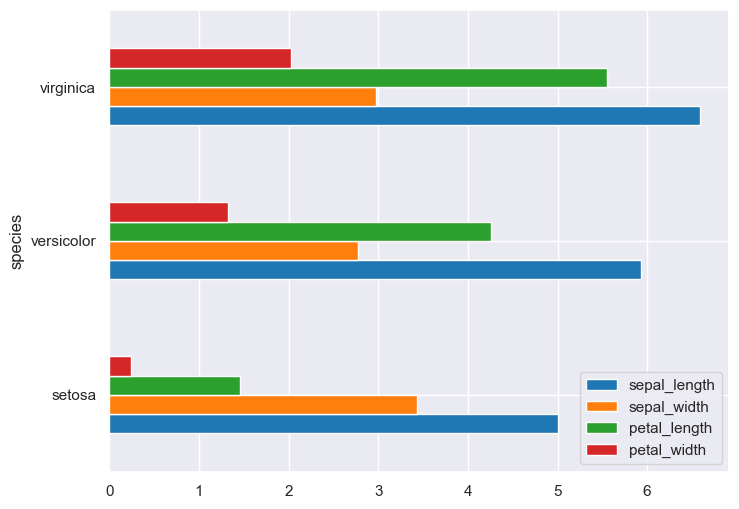

In [10]:
df_iris.groupby('species').mean().plot.barh(figsize=(8, 6))

## 1. Classify Using KNN
---

<br>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
X = df_iris.drop(columns='species')
y = df_iris.loc[:, 'species'].map({'setosa': 1, 'versicolor': 2, 'virginica': 3})

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.tail()

145    3
146    3
147    3
148    3
149    3
Name: species, dtype: int64

In [66]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=3411132)

# *RANDOM* SPLIT INTO TRAIN AND TEST

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.fit(X_tr, y_tr)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<br> <big>

## The `predict` method
---

<br>

In [36]:
srs_sample = X_te.sample(1)
srs_sample

,sepal_length,sepal_width,petal_length,petal_width
44,5.1,3.8,1.9,0.4


In [37]:
knn.predict(srs_sample)

array([1])

In [38]:
{'setosa': 1, 'versicolor': 2, 'virginica': 3}

{'setosa': 1, 'versicolor': 2, 'virginica': 3}

In [39]:
# Predict for all test cases 

y_pr = knn.predict(X_te)

In [40]:
y_pr

array([1, 1, 3, 2, 1, 2, 1, 1, 3, 3, 3, 3, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1,
       1, 1, 2, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 3, 2, 2, 1, 1, 1,
       1])

In [41]:
accuracy_score(y_te, y_pr)

0.9777777777777777

CROSS VALIDATION: because model performance reported for a model trained on a random split of data is unreliable

## 2. Classify Using a linear model
---

<br>

In [87]:
from sklearn.svm import LinearSVC

In [88]:
lsvc = LinearSVC()

In [89]:
lsvc.fit(X_tr, y_tr)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [90]:
y_pr = lsvc.predict(X_te)

In [91]:
accuracy_score(y_te, y_pr)

# This should be different from KNN

0.9333333333333333

<br><br>

# 1. Dimensionality Reduction with PCA
---

<big>

PCA is a technique to reduce the number of features in our data by finding new _components_ to represent the data. These components are typically 

- a **linear** combination of the old data; and 
- designed to _iteratively_ capture the majority of the total variance explained by the full dataset.
- each successive PC should be perpendicular (uncorrelated) with the ones before

> PCA is a very handy technique for visualizing higher-dimensional data in 2- or 3-dimensions, which are intuitively interpretable.

Here's an **example**:

We know that the `iris` dataset has four dimensions. To visualize this data, we can bring it down to two dimensions that capture most of the variance - 

<br>

<Axes: >

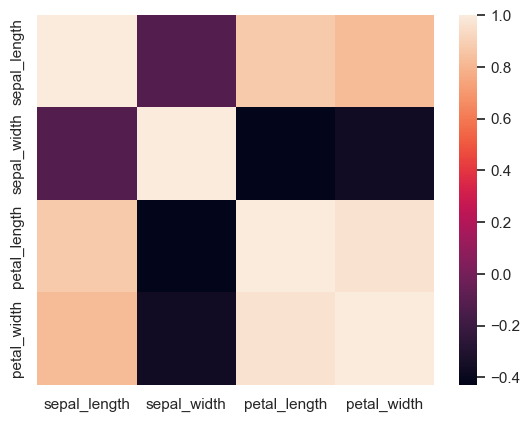

In [74]:
sns.heatmap(df_iris.drop(columns='species').corr())

In [76]:
from sklearn.decomposition import PCA

In [78]:
print(X.shape)

(150, 4)


In [82]:
pca = PCA(n_components=2).fit(X)

In [83]:
X_pca = pca.transform(X)

In [84]:
print(X_pca.shape)

(150, 2)


In [87]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [95]:
df_pca.corr().loc['PC1', 'PC2'].round(2)

np.float64(0.0)

/Users/dush/Code/cst4150/.fintech/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


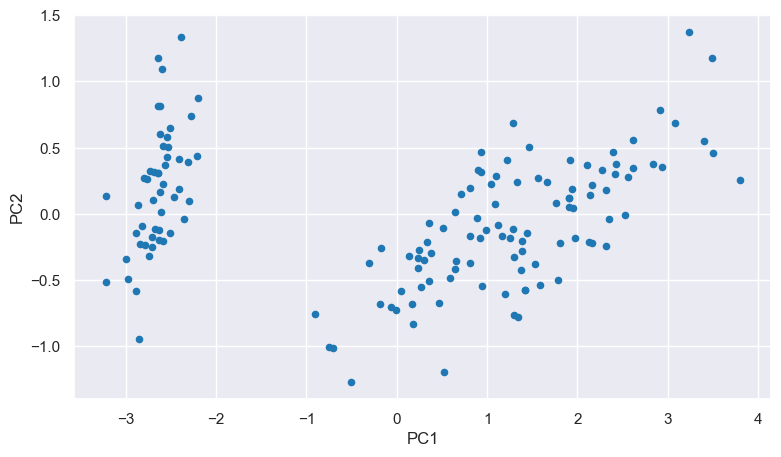

In [117]:
df_pca.plot.scatter(x='PC1', y='PC2', cmap='Spectral', figsize=(9, 5));

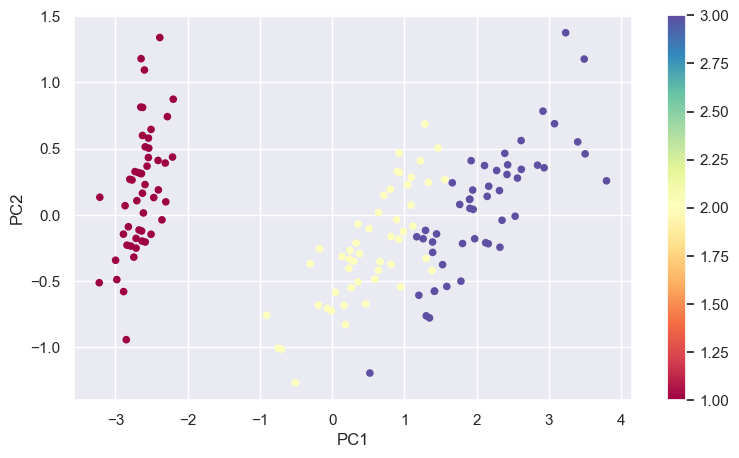

In [97]:
df_pca.plot.scatter(x='PC1', y='PC2', c=y, cmap='Spectral', figsize=(9, 5));

<big>

### Explained Variance

- The Components capture most of the variance in the data, starting with PC1 and then in descending order
- The first few PCs capture most of the variance in y as they're constructed from the most influential variables

<br>

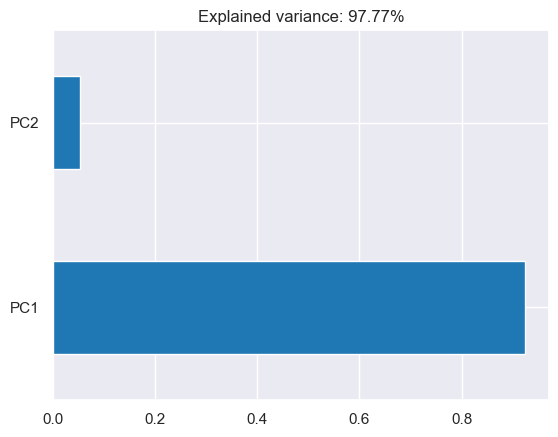

In [101]:
pd.Series(data=pca.explained_variance_ratio_, index=['PC1', 'PC2']).plot.barh(title=f'Explained variance: {pca.explained_variance_ratio_.sum():.2%}');

<big>

### Factor Loadings

- measure the influence of different features on the components
- in the example below, we see that `petal_length` contributes most to PC1 (which explain most variance in the y)
- ... and `sepal_width` contributes most to PC2

We can consider `components` as a **combination** of input features that explain most of the variance in y

<br>

In [102]:
pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_iris.columns[:-1]).round(2)

,PC1,PC2
sepal_length,0.36,0.66
sepal_width,-0.08,0.73
petal_length,0.86,-0.17
petal_width,0.36,-0.08


<br><br>

<big>
    
# 2. Feature Selection
---



- when we have a high number of features, we want to select the ones that have high correlation/impact on the target
- this reduces the complexity of the model and the hardware requirements

<br>

In [104]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

In [106]:
f_regression(X, y)

(array([ 233.8389959 ,   32.93720748, 1341.93578461, 1592.82421036]),
 array([2.89047835e-32, 5.20156326e-08, 4.20187315e-76, 4.15531102e-81]))

In [108]:
pd.DataFrame(data=f_regression(X, y), 
             index=['FScores', 'Pvalues'], 
             columns=X.columns).T.round(3).sort_values('FScores', ascending=False)

,FScores,Pvalues
petal_width,1592.824,0.0
petal_length,1341.936,0.0
sepal_length,233.839,0.0
sepal_width,32.937,0.0


<br>

## Automatically select the Top K from the F-statistic
---

In [112]:
skb = SelectKBest(k=2, score_func=f_regression)
skb.fit(X, y)

,score_func,<function f_r...t 0x11eb57560>
,k,2


In [116]:
# which features were selected
selected_features = np.array(X.columns)[skb.get_support()]
selected_features.tolist()

['petal_length', 'petal_width']

<br><br>

# Preprocessing

---

<big>
    
Many ML models require the input data to have zero mean and unit variance in order to avoid biasing the estimated parameters towards features with different units. Applying this step in `scikit-learn` has a very similar interface to other supervised learning algorithms. 

Steps involved in this process:

- Import and instantiate the `StandardScaler()` function to create a preprocessing object
- Apply it to the input data using `.fit()` to learn the required parameters for each feature
- Rescale your data by applying the `.transform()` (*not* predict) method

Here's an example:

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
# Learn the parameters for rescaling
scaler.fit(X_tr)

,copy,True
,with_mean,True
,with_std,True


In [134]:
scaler.mean_, scaler.scale_

(array([5.81047619, 3.07809524, 3.70666667, 1.19047619]),
 array([0.81075201, 0.42019971, 1.75348723, 0.77490691]))

In [135]:
# Apply it to the data
X_scaled = scaler.transform(X_tr)

df_X_scaled = pd.DataFrame(data=X_scaled, index=X_tr.index, columns=X_tr.columns)

In [136]:
df_X_scaled.mean().round(2)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width    -0.0
dtype: float64

In [137]:
df_X_scaled.std().round(2)

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

<br>

## Standardizing variables doesn't affect correlations

<br>

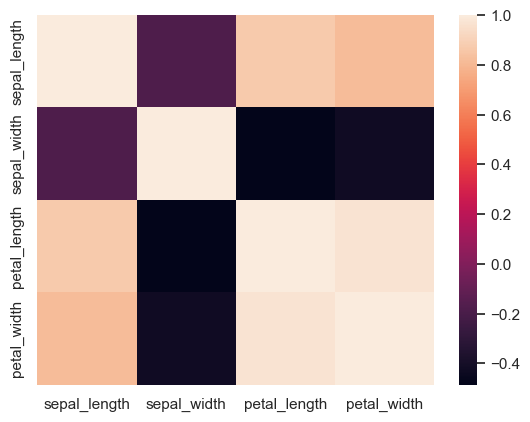

In [138]:
sns.heatmap(X_tr.corr());

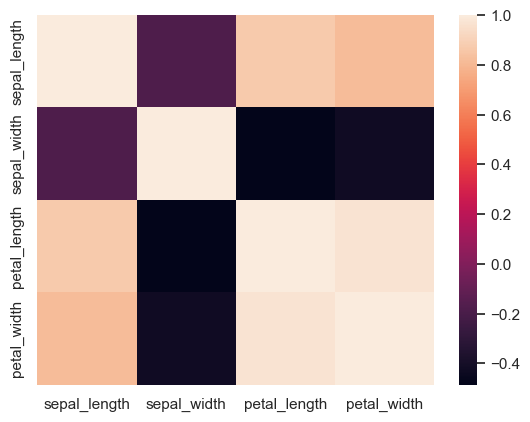

In [139]:
sns.heatmap(df_X_scaled.corr());

<br><br>

# The Bias-Variance Tradeoff
---

<big>

In statistics and machine learning, the bias–variance tradeoff (or dilemma) is the problem of simultaneously minimizing two **sources of error** that prevent supervised learning algorithms from generalizing beyond their training set (or, that lead to _overfitting_ or _underfitting_):

* The **bias** is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**). The model performs poorly on training data. This usually happens when **your model doesn't have enough complexity** to capture the variance in the data. <br><br>

* The **variance** is error from sensitivity to small fluctuations in the training set. High variance can cause **overfitting**: modeling the random noise in the training data, rather than the intended outputs. This is expected to happen if your model is **too complex**

The bias–variance decomposition is a way of analyzing a learning algorithm's expected **generalization error** with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the **irreducible error**, resulting from noise in the problem itself.

This tradeoff applies to all forms of supervised learning: classification, regression.

---

- http://scott.fortmann-roe.com/docs/BiasVariance.html
- https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff


Most models have parameters that influence the **complexity** of the model. 

> There is always a trade-off that the modeler must make between model **flexibility** and **interpretability**.

A highly complex model may fit the data well (might lead to _overfitting_) but it would be difficult to interpret. On the other hand, an overly simple model would be easier to understand but then it would not generalize well.

What we would like is a way to quantitatively identify the degree of overfit and underfit, and optimize the hyperparameters (in this case, the polynomial degree d) in order to determine the best algorithm.

<br>

<img src="https://i.sstatic.net/zbNLd.png" width=1000 height=600></img>

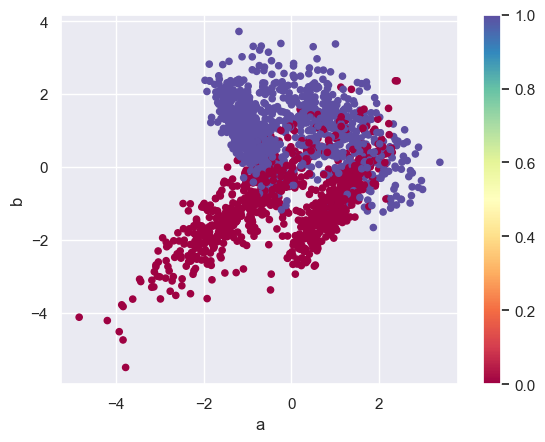

In [181]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_informative=2)

pd.DataFrame(X, columns=['a', 'b']).plot.scatter(x='a', y='b', c=y, cmap='Spectral');

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [183]:
X.shape

(2000, 2)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Let's build 20 models, each with higher complexity

- for KNN, complexity is controlled by `n_neighbors` parameters
- For k = 1 to 20, we will build a model and measure its accuracy

<br>

In [185]:
tr_te_acc = {}

for k in range(1, 20):
    """
    """
    knn_1 = KNeighborsClassifier(n_neighbors=k)
    knn_1.fit(X_train, y_train)

    tr_acc = accuracy_score(knn_1.predict(X_train), y_train)
    te_acc = accuracy_score(knn_1.predict(X_test), y_test)

    tr_te_acc[str(k).zfill(2)] = (tr_acc, te_acc)

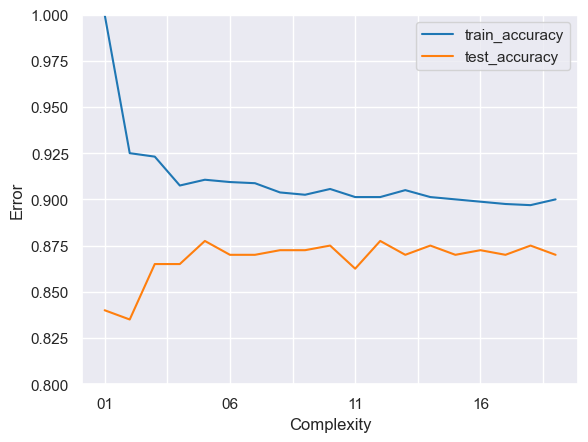

In [191]:
ax = pd.DataFrame(tr_te_acc, index=['train_accuracy', 'test_accuracy']).T.plot(ylim=(0.8, 1));
ax.set_xlabel("Complexity")
ax.set_ylabel("Error");

<br>

# Cross Validation
---

<big>

- Our model can depend on a particular random choice for the pair of (train, validation) sets.
- A solution to this problem is a procedure called cross-validation (CV for short). 
- Computationally, the data is split repeatedly into a training and test sets, with a separate model built for every pair.
- The test-set scores are then **aggregated** 

** K-fold Cross Validation **

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data

** Other CV functions **

The ``sklearn.cross_validation`` module has all functions related to cross validation. There easiest function is ``cross_val_score`` which takes an estimator and a dataset, and will do all of the splitting for you:

```python
    from sklearn.cross_validation import cross_val_score
    scores = cross_val_score(classifier, X, y, cv=5)
    # this implements 5-fold Cross Validation
    print(scores)
    print(np.mean(scores))
```

Different cross-validation methods available in `scikit-learn` include:

    KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut
            
By default, `cross_val_score()` will use ``StratifiedKFold`` for classification, which ensures that the **class proportions are preserved** in each fold. 
With standard KFold, labels are ignored.

<br>

Cross Validation functions take a `scoring=` parameter, which is set to 'accuracy' by default. Other possible values are --

```
'accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc'
```

Examples:

<img src="http://image.slidesharecdn.com/petutorial-150413084118-conversion-gate01/95/performance-evaluation-for-classifiers-tutorial-59-638.jpg?cb=1428914518">

In [170]:
from sklearn.model_selection import cross_val_score

In [224]:
X, y = make_classification(n_samples=2000, n_features=12, n_redundant=4, n_informative=5)

scores = cross_val_score(
    KNeighborsClassifier(n_neighbors=3), 
    X, 
    y, 
    cv=10, 
    scoring='accuracy'
)

In [225]:
scores

array([0.855, 0.915, 0.89 , 0.905, 0.92 , 0.9  , 0.92 , 0.93 , 0.95 ,
       0.9  ])

In [226]:
print(f"CrossValidated Recall has a mean of {scores.mean().round(2)} and a standard deviation of {scores.std().round(3)}")

CrossValidated Recall has a mean of 0.91 and a standard deviation of 0.024


<br><br>

# Hyperparameter Optimization
---

<big>

Unfortunately, **there is no general rule** how to find the sweet spot, between bias and variance, and so machine learning practitioners have to find the best trade-off of model-complexity and generalization by **trying several parameter settings.** Typical examples include 

- _C, kernel, gamma_ for Support Vector Classifier, 
- _alpha_ for Lasso
- Tree Depth, No. of Trees for RF
- No. of Neighbors for KNN

and so on.

If multiple parameters are important, we try all possible combinations by constructing a grid and searching through it. For example, in an SVM, both `c` and `gamma` need to be optimized.

> Such parameters (often referred to as _hyperparameters_) provided when constructing an estimator may be optimized. 

All the parameters that the Support Vector Classifier can be configured with

```python
SVC(self, C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)
```

**Example configurations**

```
1. C=1, kernel='rbf', gamma='auto'
2. C=0.1, kernel='rbf', gamma='auto'
3. C=10, kernel='rbf', gamma='auto'

1. C=0.1, kernel='poly', gamma='auto'
2. C=0.1, kernel='linear', gamma='auto'
````


> We create a grid of the **search space** and say, "Look for the best combination of C, Kernel and Gamma over these values that optimize my performance metric"

<br>

### Estimation using `GridSearchCV`

A search consists of:

- an estimator
- a parameter space (declared as a **dictionary**)
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

There is a built-in class for this functionality in scikit-learn called `GridSearchCV()` We will start by creating an object of this class.

    gscv_knn = GridSearchCV(Classifier, X_train, y_train, grid=, scoring=, cv=, verbose=True)

> The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested

GridSearchCV is a **meta-estimator**, ie, it takes an estimator like SVM, and creates a new estimator, that behaves exactly the same so that we can call `fit()` on it.

    grid.fit(X, y)
    
What `fit` does is a bit more involved then what we did above. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

Then, as with all models, we can use predict or score

    grid.predict(X)
    
You can inspect the best parameters found by ``GridSearchCV`` in the ``.best_params_`` attribute, and the best score in the ``.best_score_`` attribute:

    print(grid.best_score_)
    print(grid.best_params_)
    
### Rationale for using CV Set

By doing a grid search, we might be committing a mistake is called a **multiple hypothesis testing error**. 

> If you try many parameter settings, some of them will work better just by chance. 

It is therefore good practice to use CV and perform all parameter optimization using the Validation sample while holding out the Test set for a final measure of out-of-sample accuracy.

### If we had to do this manually, for the SVC

In [231]:
for k in ['linear', 'rbf']:
    for c in [0.1, 10, 1]:
        svc_1 = SVC(kernel=k, C=c)
        score = cross_val_score(svc_1, X, y, cv=5)
        print('Kernel=',k,'...C=',c, '...Accuracy=', score.mean())

Kernel= linear ...C= 0.1 ...Accuracy= 0.758
Kernel= linear ...C= 10 ...Accuracy= 0.7585
Kernel= linear ...C= 1 ...Accuracy= 0.7585
Kernel= rbf ...C= 0.1 ...Accuracy= 0.852
Kernel= rbf ...C= 10 ...Accuracy= 0.9185000000000001
Kernel= rbf ...C= 1 ...Accuracy= 0.9035


---

## $Example$

In [232]:
from sklearn.datasets import load_iris

X = load_iris()['data']
y = load_iris()['target']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.85, random_state=312543)

In [234]:
from sklearn.model_selection import GridSearchCV

In [239]:
svm_params = {
    'kernel': ['poly', 'rbf'], 
    'C': [10, 1],
    'degree': [2, 3, 4]
}

gscv_scm = GridSearchCV(estimator=SVC(), 
                        param_grid=svm_params, 
                        cv=5, 
                        scoring='accuracy', 
                        verbose=True)

In [240]:
gscv_scm.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,SVC()
,param_grid,"{'C': [10, 1], 'degree': [2, 3, ...], 'kernel': ['poly', 'rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [241]:
gscv_scm.best_estimator_

,C,1
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [242]:
gscv_scm.best_params_

{'C': 1, 'degree': 2, 'kernel': 'poly'}

In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gscv_scm.predict(X_test))

1.0

---
## GridSearchCV on kNN

In [247]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
    }

In [254]:
X, y = make_classification(n_samples=3000, n_features=15, n_redundant=5, n_informative=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.85, random_state=312543)

In [255]:
gscv_knn = GridSearchCV(KNeighborsClassifier(), 
                        knn_params, 
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1
                       )

gscv_knn.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [256]:
pd.DataFrame(gscv_knn.cv_results_).set_index('params').loc[:, 'mean_test_score':]

,mean_test_score,std_test_score,rank_test_score
params,,,
"{'n_neighbors': 3, 'weights': 'uniform'}",0.905098,0.014600,7
"{'n_neighbors': 3, 'weights': 'distance'}",0.904706,0.015269,8
"{'n_neighbors': 5, 'weights': 'uniform'}",0.910980,0.018419,1
"{'n_neighbors': 5, 'weights': 'distance'}",0.910588,0.018626,2
"{'n_neighbors': 7, 'weights': 'uniform'}",0.907059,0.015117,5
"{'n_neighbors': 7, 'weights': 'distance'}",0.907059,0.016198,5
"{'n_neighbors': 9, 'weights': 'uniform'}",0.908235,0.012792,3
"{'n_neighbors': 9, 'weights': 'distance'}",0.907843,0.013183,4


In [257]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
grid_tree = {
    'max_depth': [3, 5, 9, 13],
    'min_samples_leaf': [25, 50, 200],
    'max_features': [4, 6, 8],
}

In [261]:
from sklearn.metrics import f1_score

In [266]:
gscv_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=grid_tree, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=5, 
    verbose=1
)

In [272]:
gscv_tree.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [4, 6, ...], 'min_samples_leaf': [25, 50, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [273]:
pd.DataFrame(gscv_tree.cv_results_).set_index('params').loc[:, 'mean_test_score':].sort_values('rank_test_score')

,mean_test_score,std_test_score,rank_test_score
params,,,
"{'max_depth': 13, 'max_features': 8, 'min_samples_leaf': 25}",0.855294,0.019663,1
"{'max_depth': 9, 'max_features': 8, 'min_samples_leaf': 25}",0.847059,0.018725,2
"{'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 25}",0.838824,0.007059,3
"{'max_depth': 13, 'max_features': 6, 'min_samples_leaf': 25}",0.834510,0.021855,4
"{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 25}",0.827451,0.024740,5
"{'max_depth': 9, 'max_features': 8, 'min_samples_leaf': 50}",0.827451,0.016592,5
"{'max_depth': 13, 'max_features': 8, 'min_samples_leaf': 50}",0.824314,0.024603,7
"{'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 25}",0.822745,0.025823,8
"{'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 50}",0.820392,0.029046,9


In [275]:
y_pred = gscv_tree.best_estimator_.predict(X_test)

In [277]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       220
           1       0.82      0.75      0.78       230

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



In [280]:
pd.DataFrame(data=confusion_matrix(y_test, y_pred), index=['T', 'F'], columns=['T', 'F'])

,T,F
T,183,37
F,58,172


In [281]:
(183 + 172)/(183+172+58+37)

0.7888888888888889